<a href="https://colab.research.google.com/github/jshuaaaa/TensorFlow-Notebook/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regresiion problem but in our case, were going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2



## Creating a data to view and fit

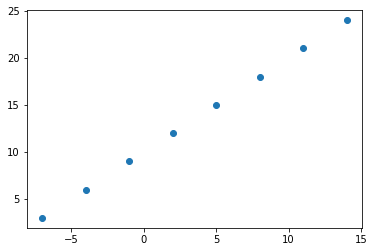

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Create labels
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#Visualize it
plt.scatter(X,Y)

In [4]:
Y == X +10


array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes 

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "garage", "bathroom"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'garage', b'bathroom'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0], Y[0]


(-7.0, 3.0)

In [9]:
# Turn arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

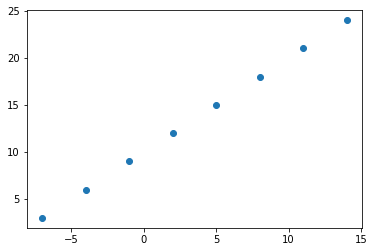

In [11]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. Creating a model - define the input and output layers, as well as hidden layers
2. Compile a model - define the loss function (in other words the function which tells ouyr model how wrong it is) and the optimzer (tells our model how to improve) and evalutation metrics (what we use to interpret the performance of the model)
3. Fitting a model - letting the model try to find patters between X and y

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 30ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 329ms/step


array([[30.158512]], dtype=float32)

## Improving our model

We can improve our mode, by altering the steps we took to create a model.

1. **Creating a model** - we might add more layers, increase number of hidden units, change the activation function of each layer.
2. **Compiling** - here we might change the optimization function or perheraps the learning rate of the optimization function
3. **Fitting a model** - fit a model for more epochs or on more data

In [56]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.0472 - mae: 13.0472
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0617 - mae: 12.0617
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0660 - mae: 11.0660
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0558 - mae: 10.0558
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0256 - mae: 9.0256
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9690 - mae: 7.9690
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8801 - mae: 6.8801
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9894 - mae: 6.9894
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4367 - mae: 7.4367
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.7722 - mae: 7.7722
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss

In [59]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 32ms/step


array([[27.953405]], dtype=float32)

## Evaluating a model

IN practice, a typical workflow youll go through when buildiing a neural network is:

```
Build a model -> fit it -> test it -> repeat
```

Always remember to visualize your models

In [61]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [62]:
# Make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

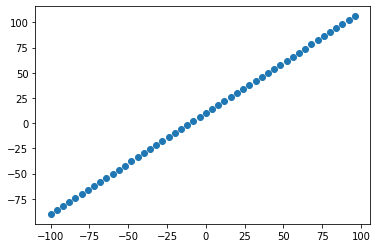

In [64]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets... 

* Training set - the model learns from this data
typically 70-80% of the total data available
* Validation set - the model gets tuned on this data, which is typically 10-15% of data available
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [65]:
# Check the length of how many samples we have
len(X)

50

In [70]:
# Splitting data into two sets (training, test)
X_train = X[:40] # first 40 
X_test = X[40:] # last 10
y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data in two differents sets... lets visualize it


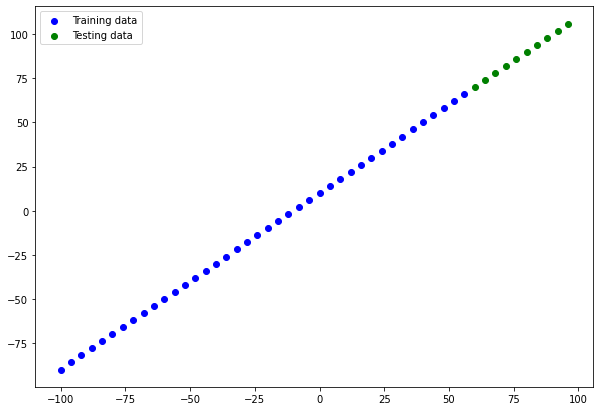

In [68]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show legend
plt.legend();

In [72]:
# Build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100)

### Visualizing our model

In [91]:
# Create a model which builds automatically by defining the input_shape argument in the first layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Test")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [92]:
model.summary()

Model: "Test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of params in the model
* Trainable params = these are the parameters (patterns) that update as the model trains

* Non-trainable params - these params arent updated during training (typical when bringing in already learned patterns from other models during transfer learning)

**Resource:** For a more in-depth overview of trainable parms within a layer, check out MIT's Introduction deep learning video

**Exercise:** Play around with the number of hidden units in the dense layer, and see how that effects the number of params

In [93]:
model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100, verbose=0)

In [94]:
model.summary()

Model: "Test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


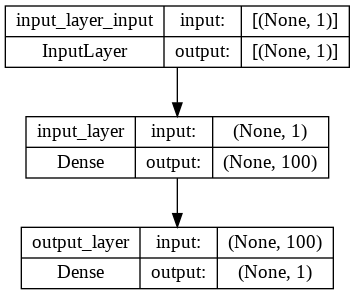

In [95]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualing our model's predicitions

To visualize predicitions, its a good idea to plot them against the ground truth labels

Often youll see this in the form of 'y_test' or 'y_true' versus 'y_pred'

In [96]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 163ms/step


array([[ 69.55228],
       [ 74.0766 ],
       [ 78.60094],
       [ 83.12527],
       [ 87.64959],
       [ 92.17394],
       [ 96.69828],
       [101.22258],
       [105.74694],
       [110.27126]], dtype=float32)

In [97]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [101]:
# Lets create a plotting function
def plot_prediction(train_data=X_train,
                       train_labels=y_train,
                       test_data=X_test,
                       test_labels=y_test,
                       predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

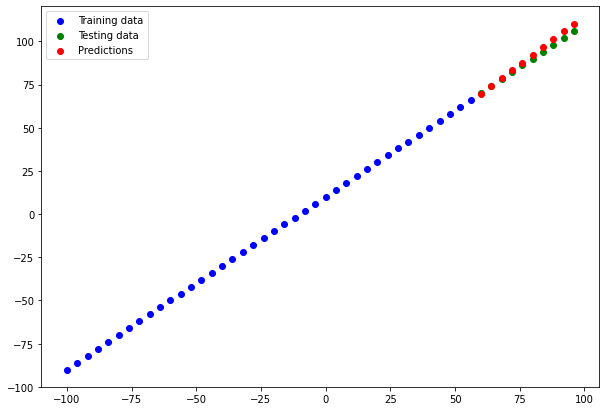

In [102]:
plot_prediction()